## Test a new DataGenerator for Keras considering both, the classical augmentation algorithm and albumentations.

#Need to install Keras
https://github.com/tensorflow/models/issues/4668
conda install python=3.6
pip install tensorflow
pip install keras

In [1]:
import sys
sys.path.insert(0, '../') #to load FileDataGenerator

In [2]:
from FileDataGenerator import FileDataGen 
import numpy as np
from matplotlib import pyplot as plt
import skimage.io
import os
from keras.preprocessing.image import ImageDataGenerator #In order to compare the new class
import time

Using TensorFlow backend.


In [3]:
DB_Path = '/Users/dfreire/Dropbox/Datasets/small_dataset/train'

In [4]:
def execTime(generator, iterations):
    i=0
    start_time = time.time()
    for image_batch, labels_batch in generator:
        i+=1
        if i%iterations==0:
            break
    print("--- %s seconds ---" % (time.time() - start_time))

In [5]:
def get_images(generator, img_num):
    images = []
    i=0
    for image_batch, labels_batch in generator:
        for img in image_batch:
            images.append(img)
            i+=1
            if i%img_num==0:
                return np.array(images)

In [6]:
def print_images(generator):
    columns = 4
    rows = 5
    fig=plt.figure(figsize=(10, 10))

    imgs = get_images(generator, 20)

    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow((imgs[i-1]*255).astype(np.uint8))

    plt.show()

### Prepare Data

In [7]:
def Read_Directory(path):
    data=[]
    labels=[]
    for class_ in os.listdir(path):
        dat = [os.path.join(path, class_, img) for img in os.listdir(os.path.join(path, class_))]
        lab = [class_ for i in os.listdir(os.path.join(path, class_))]
        labels = labels+lab
        data = data + dat

    data = np.array(data)
    labels = np.array(labels)
    return data, labels

In [8]:
data, labels = Read_Directory(DB_Path)

In [9]:
print('Data shape: {}'.format(data.shape))
print('Rows:\n {}'.format(data))

Data shape: (2000,)
Rows:
 ['/Users/dfreire/Dropbox/Datasets/small_dataset/train/cats/cat.0.jpg'
 '/Users/dfreire/Dropbox/Datasets/small_dataset/train/cats/cat.1.jpg'
 '/Users/dfreire/Dropbox/Datasets/small_dataset/train/cats/cat.10.jpg' ...
 '/Users/dfreire/Dropbox/Datasets/small_dataset/train/dogs/dog.997.jpg'
 '/Users/dfreire/Dropbox/Datasets/small_dataset/train/dogs/dog.998.jpg'
 '/Users/dfreire/Dropbox/Datasets/small_dataset/train/dogs/dog.999.jpg']


In [10]:
print('Data shape: {}'.format(labels.shape))
print('Elements:\n {}'.format(labels))

Data shape: (2000,)
Elements:
 ['cats' 'cats' 'cats' ... 'dogs' 'dogs' 'dogs']


### Classical Keras ImageDataGenerator

In [11]:
datagen = ImageDataGenerator(rescale=1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)
datagene = datagen.flow_from_directory(
    DB_Path,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [12]:
len_datos = 2000
batch_size = 20
iterations = int(np.floor(len_datos / batch_size))
print('Iterations: {}'.format(iterations))

Iterations: 100


In [13]:
execTime(datagene, iterations)

--- 17.70904302597046 seconds ---


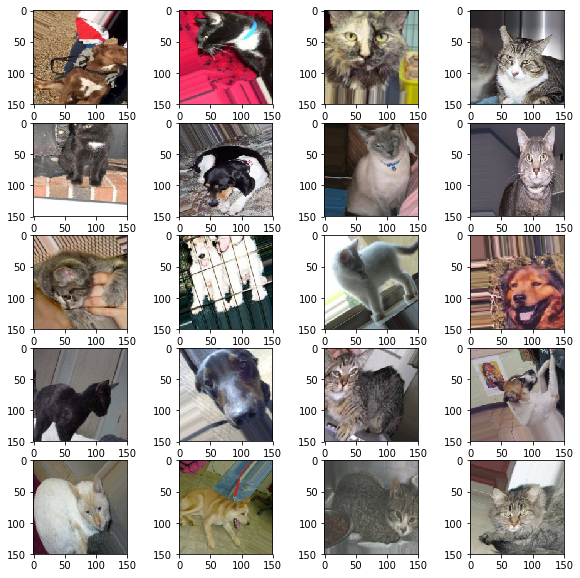

In [14]:
print_images(datagene)

### New FileDataGen --> Reading images not from a Path, but from a list of images (and labels)

In [15]:
#### Augmentation -> Classical augmentation (same as above)

In [16]:
datagen_ = FileDataGen(rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      horizontal_flip=True)

datagene_ = datagen_.flow_from_filelist(data,
                                      labels,
                                      target_size=(150,150),
                                      batch_size=20,
                                      class_mode='binary')

Found 2000 images belonging to 2 classes.


In [17]:
len_datos = 2000
batch_size = 20
iterations = int(np.floor(len_datos / batch_size))
print('Iterations: {}'.format(iterations))

Iterations: 100


In [18]:
execTime(datagene_, iterations)

--- 18.6494882106781 seconds ---


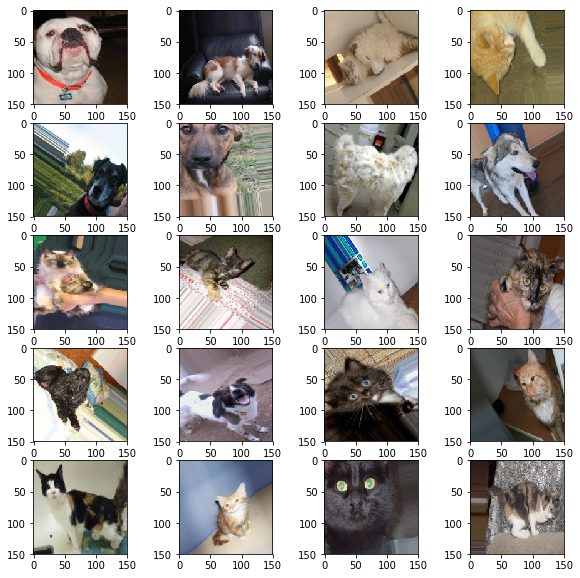

In [19]:
print_images(datagene_)

In [20]:
#### Augmentation -> Albumentations --> ShiftScaleRotate

In [21]:
datagen_ = FileDataGen(rescale=1./255,
                      aug_mode = 'ShiftScaleRotate')

datagene_ = datagen_.flow_from_filelist(data,
                                      labels,
                                      target_size=(150,150),
                                      batch_size=20,
                                      class_mode='binary')

Found 2000 images belonging to 2 classes.


In [22]:
execTime(datagene_, iterations)

--- 7.443216323852539 seconds ---


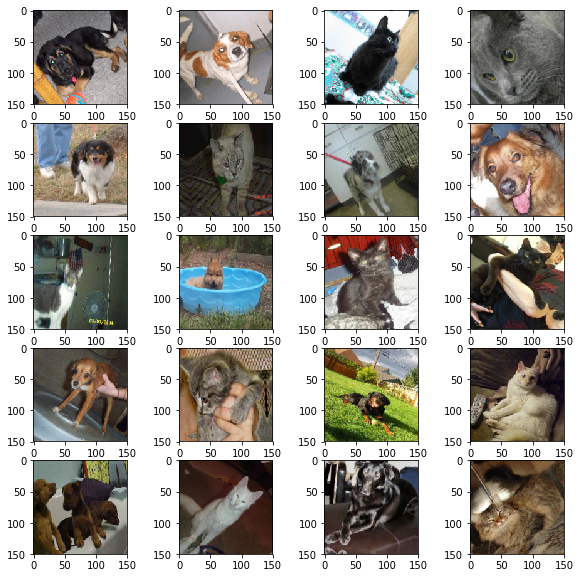

In [23]:
print_images(datagene_)

In [24]:
#### Augmentation -> Albumentations --> IAAPerspective

In [25]:
datagen_ = FileDataGen(rescale=1./255,
                      aug_mode = 'IAAPerspective')

datagene_ = datagen_.flow_from_filelist(data,
                                      labels,
                                      target_size=(150,150),
                                      batch_size=20,
                                      class_mode='binary')

Found 2000 images belonging to 2 classes.


In [26]:
execTime(datagene_, iterations)

--- 9.612066984176636 seconds ---


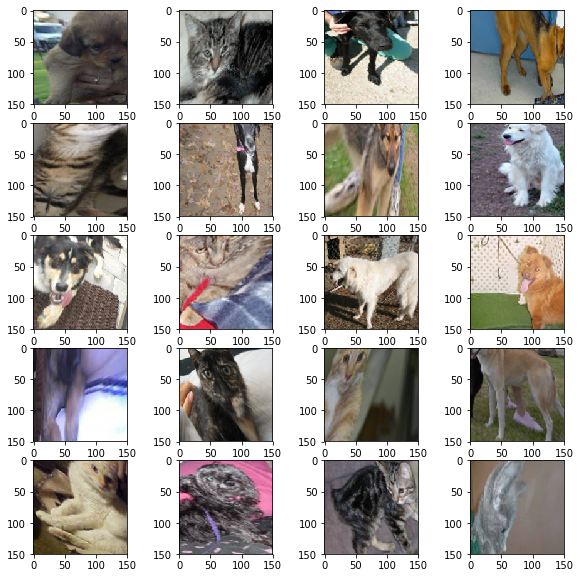

In [27]:
print_images(datagene_)

In [28]:
#### Augmentation -> Albumentations --> MediumAug

In [29]:
datagen_ = FileDataGen(rescale=1./255,
                      aug_mode = 'MediumAug')

datagene_ = datagen_.flow_from_filelist(data,
                                      labels,
                                      target_size=(150,150),
                                      batch_size=20,
                                      class_mode='binary')

Found 2000 images belonging to 2 classes.


In [30]:
execTime(datagene_, iterations)

--- 15.435407161712646 seconds ---


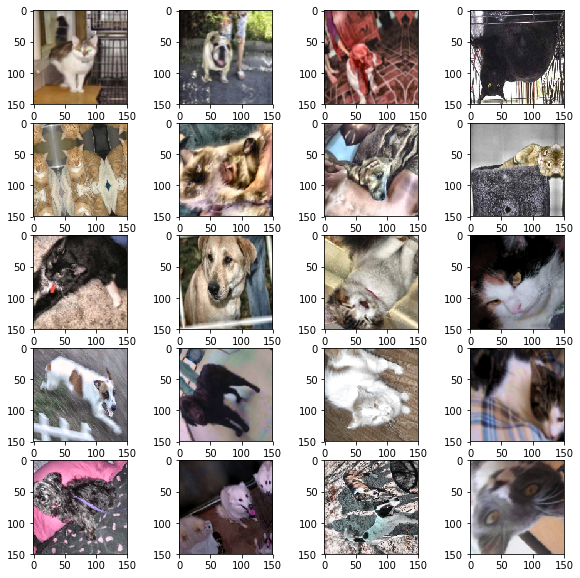

In [31]:
print_images(datagene_)

In [32]:
#### Augmentation -> Albumentations --> StrongAug

In [33]:
datagen_ = FileDataGen(rescale=1./255,
                      aug_mode = 'StrongAug')

datagene_ = datagen_.flow_from_filelist(data,
                                      labels,
                                      target_size=(150,150),
                                      batch_size=20,
                                      class_mode='binary')

Found 2000 images belonging to 2 classes.


In [34]:
execTime(datagene_, iterations)

//anaconda/envs/SCI_env/lib/python3.6/site-packages/albumentations/augmentations/functional.py:271: RuntimeWarning: invalid value encountered in true_divide
  return cv2.filter2D(img, -1, kernel / np.sum(kernel))


--- 17.2779860496521 seconds ---


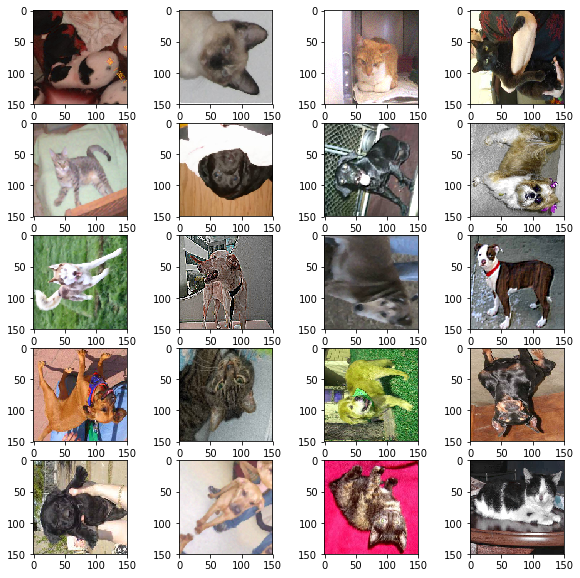

In [35]:
print_images(datagene_)